About the data set (Heart disease data)
The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile.
Attribute information:

male: Gender of patient: male(1) or female(0)

age: Age of patient

education: Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

currentSmoker: Whether the patient is a smoker now: Yes(1) or No(0)

cigsPerDay: Average number of cigarettes smoked by patient per day

BPMeds: Whether the patient is on blood pressure medications: Yes(1) or No(0)

prevalentStroke: If the patient has a history of heart stroke: Yes(1) or No(0)

prevalentHyp: If the patient has a history of hypertension: Yes(1) or No(0)

diabetes: If the patient has a diabetes: Yes(1) or No(0)

totChol: Average cholesterol levels in mg/dL

sysBP: Average systolic blood pressure of patient

diaBP: Average diastolic blood pressure of patient

BMI: BMI of patient

heartRate: Avergae heartrate of patient

glucose: Average blood glucose levels of patient

CVD: Does the patient have cardiovascular disease: Yes(1) or No(0)

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
 
from sklearn.preprocessing import MinMaxScaler


# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# import the functions for visualizing the decision tree
#import pydotplus
#from IPython.display import Image  

# import function to perform feature selection
from sklearn.feature_selection import RFE


In [2]:
df_heart = pd.read_csv("Heart_disease.csv")
df_heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df_heart.shape


(4240, 16)

In [4]:
df_heart.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

In [5]:
#Convert column which are wrongly names as numeric to object type
df_heart['male']=df_heart['male'].astype(object)
df_heart['education']=df_heart['education'].astype(object)
df_heart['currentSmoker']=df_heart['currentSmoker'].astype(object)
df_heart['BPMeds']=df_heart['BPMeds'].astype(object)
df_heart['prevalentStroke']=df_heart['prevalentStroke'].astype(object)
df_heart['prevalentStroke']=df_heart['prevalentStroke'].astype(object)
df_heart['prevalentHyp']=df_heart['prevalentHyp'].astype(object)
df_heart['diabetes']=df_heart['diabetes'].astype(object)

In [6]:
df_heart.dtypes

male                object
age                  int64
education           object
currentSmoker       object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

In [7]:
((df_heart.isnull().sum() / df_heart.index.size)*100).sort_values(ascending=False)

glucose            9.150943
education          2.476415
BPMeds             1.250000
totChol            1.179245
cigsPerDay         0.683962
BMI                0.448113
heartRate          0.023585
male               0.000000
age                0.000000
currentSmoker      0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
CVD                0.000000
dtype: float64

In [8]:
#except glucose, we will drop null all the null records from other column as their percentage is less
df_heart=df_heart.dropna(subset=['education','BPMeds','totChol','cigsPerDay','BMI','heartRate'])

In [9]:
#fill missing values by using the median
df_heart['glucose']=df_heart['glucose'].fillna(df_heart['glucose'].median())

In [10]:
df_heart['CVD'].value_counts(normalize=True)*100

#0 class --> People with no CVD
# 1 class --> people with CVD so we can say classes are fairly represented

0    85.083981
1    14.916019
Name: CVD, dtype: float64

In [11]:
#filer, check histogram for numeric and count plot for cat
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_heart.select_dtypes(include = [np.number])
df_num = df_heart.drop('CVD', axis = 1)
# display numerical features
df_num.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [12]:
#whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient.

In [13]:
df_num = df_heart.iloc[:,[10,11]]
# 10 and 11 columns are diaBP and sysBP (numerical values) and coverting the to dataframe

X=pd.DataFrame(df_num, columns=df_num.columns) 

#converting BPmeds(categorical) into numeric
X['BPMeds']=pd.get_dummies(df_heart['BPMeds'],drop_first=True)

y=df_heart.CVD 
#here , X will store independent variables and y will store target variable

In [14]:
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=1,
                                                   test_size=0.2)
logreg = sm.Logit(y_train,X_train).fit()
print(logreg.summary())

#from the conclusion we can see sys bp affects CVD greatly

Optimization terminated successfully.
         Current function value: 0.400832
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3187
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                 0.05096
Time:                        18:16:21   Log-Likelihood:                -1279.1
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 1.399e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5006      0.353    -12.749      0.000      -5.193      -3.809
sysBP          0.0272      0.

In [15]:
#whether or not a patient has cardiovascular disease using the categorical variables in the dataset. 

In [16]:
df_cat=df_heart.select_dtypes(include='object')
X= pd.get_dummies(df_cat, drop_first= True)
y=df_heart.CVD 

In [17]:
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=1,
                                                   test_size=0.2)
logreg = sm.Logit(y_train,X_train).fit()
print(logreg.summary())
df_odds= pd.DataFrame(np.exp(logreg.params),columns=['odd'])
# odds is e to the power b0+b1x1...
# just np.exp(logreg.params) give in array format
df_odds

#a unit change in each feature influence : eg. 1 unit change in male1 will bring 1.6799 units change in odds

Optimization terminated successfully.
         Current function value: 0.398923
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3181
Method:                           MLE   Df Model:                            9
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                 0.05548
Time:                        18:16:21   Log-Likelihood:                -1273.0
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 1.094e-27
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.2699      0.115    -19.745      0.000      -2.495      -2.045
male_1  

,odd
const,0.103328
male_1,1.679930
education_2.0,0.626836
education_3.0,0.796133
education_4.0,0.798434
currentSmoker_1,1.223758
BPMeds_1.0,1.983432
prevalentStroke_1,1.995138
prevalentHyp_1,2.244576
diabetes_1,2.373889


In [18]:
#if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. 

In [19]:
X= pd.get_dummies(df_heart['prevalentHyp'], drop_first= True)
y=df_heart.CVD
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=1,
                                                   test_size=0.2)
logreg = sm.Logit(y_train,X_train).fit()

print(logreg.summary())

df_odds= pd.DataFrame(np.exp(logreg.params),columns=['odd'])

#to calculate odds 
odd_hyp = df_odds.iloc[1,0]

odd_no_hyp =(1/df_odds.iloc[1,0])

print("odds of patient having a heart disease provided patient is hypertensed",odd_hyp)
print("odds of patient not having a heart disease provided patient is hypertensed",odd_no_hyp)
print("odd ratio",(odd_hyp/odd_no_hyp))

Optimization terminated successfully.
         Current function value: 0.409951
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3189
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                 0.02937
Time:                        18:16:21   Log-Likelihood:                -1308.2
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 5.717e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0800      0.068    -30.695      0.000      -2.213      -1.947
1              0.9083      0.

In [20]:
#a full model to predict if a patient will have a cardiovascular disease

In [21]:
df_num = df_heart.select_dtypes(include=np.number).drop(['CVD'],axis=1)
df_cat=df_heart.select_dtypes(include='object')
df_cat=pd.get_dummies(df_cat,drop_first=True)
#we do pd.get dummies coz we cannot give categorical variables to our model

X=pd.concat([df_num,df_cat],axis=1)
y=df_heart.CVD
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=1,
                                                   test_size=0.2)
logreg_full = sm.Logit(y_train,X_train).fit()
print(logreg_full.summary())

Optimization terminated successfully.
         Current function value: 0.374542
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3173
Method:                           MLE   Df Model:                           17
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                  0.1132
Time:                        18:16:22   Log-Likelihood:                -1195.2
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 9.740e-55
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.1008      0.767    -10.566      0.000      -9.604      -6.598
age     

In [22]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg_full.aic)
#It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

AIC: 2426.325069062681


In [23]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg_full.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
const,0.000303
age,1.064534
cigsPerDay,1.019290
totChol,1.002269
sysBP,1.015520
diaBP,0.998394
BMI,0.994049
heartRate,0.996440
glucose,1.006773
male_1,1.670221


In [24]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_full.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

1846    0.051414
212     0.398992
4151    0.026380
1298    0.129119
130     0.180857
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [25]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

[0, 0, 0, 0, 0]

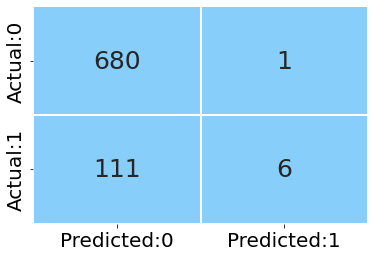

In [26]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

In [27]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

In [28]:
#Precision: It is defined as the ratio of true positives to the total positive predictions.

# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.8571428571428571

In [29]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.05128205128205128

In [30]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.9985315712187959

In [31]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.0967741935483871

In [32]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.8596491228070176

In [33]:
#We can also calculate the above measures using the `classification_report()`
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       681
           1       0.86      0.05      0.10       117

    accuracy                           0.86       798
   macro avg       0.86      0.52      0.51       798
weighted avg       0.86      0.86      0.80       798



From the above output, we can infer that the recall of the positive class is known as sensitivity and the recall of the negative class is specificity.

support is the number of observations in the corresponding class.

The macro average in the output is obtained by averaging the unweighted mean per label and the weighted average is given by averaging the support-weighted mean per label.

**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

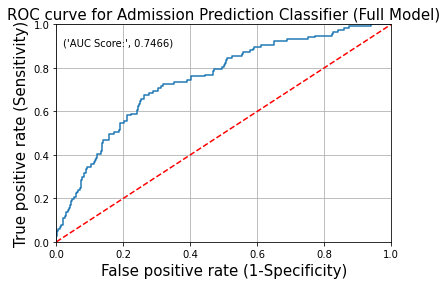

In [34]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

In [35]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg_full.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [36]:
#Identify the Best Cut-off Value
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg_full, value)

In [37]:
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.663767,0.217865,0.854701,0.528822,0.148177,0.347222
1,0.200000,0.673651,0.320000,0.547009,0.763158,0.268444,0.403785
2,0.300000,0.589424,0.381579,0.247863,0.830827,0.209205,0.300518
3,0.400000,0.543074,0.433333,0.111111,0.848371,0.124476,0.176871
4,0.500000,0.524907,0.857143,0.051282,0.859649,0.081571,0.096774
5,0.600000,0.512821,1.000000,0.025641,0.857143,0.042984,0.050000
6,0.700000,0.504274,1.000000,0.008547,0.854637,0.014500,0.016949
7,0.800000,0.500000,0.000000,0.000000,0.853383,0.000000,0.000000
8,0.900000,0.500000,0.000000,0.000000,0.853383,0.000000,0.000000


**Interpretation:** The above dataframe shows that, the model cut_off probability 0.2, returns the highest AUC score, f1-score, kappa score.

In the above method, we passed the list of values for the cut-off. But, this method is not efficient as one can pass different values and obtain a cut-off based on the passed values.
To obtain the optimal cut-off value we use the following methods:
Youden's Index
Cost-based Method

Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.

Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR)

i.e. select the cut-off probability for which the (TPR - FPR) is maximum.

In [38]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.675214,0.261380,0.167451,0.413833
1,0.726496,0.318649,0.148395,0.407847
2,0.683761,0.277533,0.163363,0.406228
3,0.658120,0.252570,0.172574,0.405550
4,0.709402,0.303965,0.155402,0.405437


In [39]:
# As we can see that the optimal cut-off probability is approximately 0.17

In [40]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.17 else 1 for x in y_pred_prob]

In [41]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.93      0.74      0.82       681
           1       0.30      0.66      0.42       117

    accuracy                           0.73       798
   macro avg       0.62      0.70      0.62       798
weighted avg       0.84      0.73      0.76       798



From the above output, we can see that the model with cut-off = 0.17, is 73% accurate.??????

In the linear regression module, we learn about various techniques for selecting the significant features in the dataset. In this project, let us consider the RFE method for feature selection.

In [42]:
# consider the independent variables (without the intercept term)
# as, X_train and X_test contains the intercept term
# use 'iloc' to select the variables wthout intercept term 
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]

# initiate logistic regression model to use in feature selection
logreg_full = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg_full, n_features_to_select = 3)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train_rfe, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['BPMeds_1.0', 'prevalentHyp_1', 'diabetes_1'], dtype='object')


In [43]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
# consider the variables obtained from RFE method and the intercept term
logreg_rfe = sm.Logit(y_train, X_train[['const', 'BPMeds_1.0', 'prevalentHyp_1', 'diabetes_1']]).fit()

# print the summary of the model
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.406927
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3187
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                 0.03653
Time:                        18:16:25   Log-Likelihood:                -1298.5
converged:                       True   LL-Null:                       -1347.7
Covariance Type:            nonrobust   LLR p-value:                 3.325e-21
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.1031      0.068    -30.752      0.000      -2.237      -1.969
BPMeds_1.0       

In [44]:
print('AIC:', logreg_rfe.aic)

AIC: 2605.009429542432


In [45]:
# let 'y_pred_prob_rfe' be the predicted values of y
y_pred_prob_rfe = logreg_rfe.predict(X_test[['const', 'BPMeds_1.0', 'prevalentHyp_1', 'diabetes_1']])

# print the y_pred_prob_rfe
y_pred_prob_rfe.head()

1846    0.108798
212     0.216616
4151    0.108798
1298    0.216616
130     0.108798
dtype: float64

In [46]:
y_pred_rfe = [ 0 if x < 0.2 else 1 for x in y_pred_prob_rfe]

In [47]:
y_pred_rfe[0:5]

[0, 1, 0, 1, 0]

In [48]:
# performance measures obtained by classification_report()
result = classification_report(y_test, y_pred_rfe)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.72      0.81       681
           1       0.27      0.58      0.36       117

    accuracy                           0.70       798
   macro avg       0.59      0.65      0.59       798
weighted avg       0.82      0.70      0.74       798



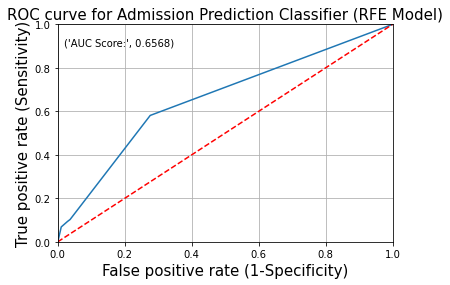

In [49]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfe)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_rfe),4)))
                               
# plot the grid
plt.grid(True)

In [50]:
# initialize the MinMaxScaler
X_norm = MinMaxScaler()

# normalize all the numerical columns
# normalize all the columns of the dataframe 'df_num'
num_norm = X_norm.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_norm, columns = df_num.columns)

X.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0.184211,0.000000,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.368421,0.000000,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695
2,0.421053,0.285714,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.763158,0.428571,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.368421,0.328571,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119


In [51]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X, df_heart['CVD'], random_state = 10, test_size = 0.2)


In [52]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train_norm, y_train)

In [53]:
test_pred = knn_model.predict(X_test_norm)

In [54]:
# performance measures obtained by classification_report()
result = classification_report(y_test, test_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       666
           1       0.31      0.12      0.17       132

    accuracy                           0.81       798
   macro avg       0.58      0.53      0.53       798
weighted avg       0.76      0.81      0.77       798



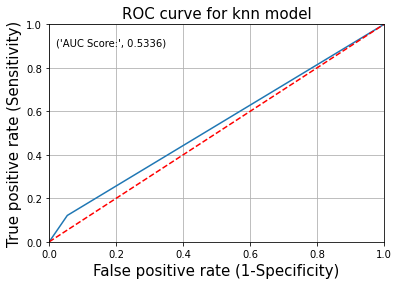

In [55]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for knn model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, test_pred),4)))
                               
# plot the grid
plt.grid(True)

In [56]:
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the dictionary with hyperparameters and its values
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train_norm, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 23} 



In [57]:
test_pred_grid = knn_grid.predict(X_test_norm)

In [58]:
# performance measures obtained by classification_report()
result = classification_report(y_test, test_pred_grid)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       666
           1       0.50      0.02      0.04       132

    accuracy                           0.83       798
   macro avg       0.67      0.51      0.48       798
weighted avg       0.78      0.83      0.77       798



In [62]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train_norm, y_train)

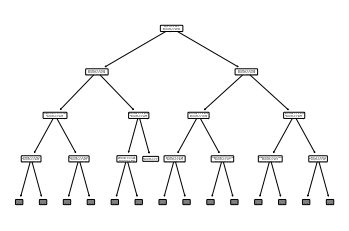

In [63]:
tree.plot_tree(decision_tree,max_depth=3,feature_names=X_train_norm.columns,rounded=True)
plt.rcParams['figure.figsize'] = [30,17]
plt.show()


The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the training data. We can calculate the difference between the train and test accuracy to identify if there is over-fitting.

In [64]:
train_pred_des=decision_tree.predict(X_train_norm)

In [65]:
result = classification_report(y_train, train_pred_des)

# print the result
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2728
           1       1.00      1.00      1.00       463

    accuracy                           1.00      3191
   macro avg       1.00      1.00      1.00      3191
weighted avg       1.00      1.00      1.00      3191



In [66]:
test_pred_des=decision_tree.predict(X_test_norm)

In [67]:
# performance measures obtained by classification_report()
result = classification_report(y_test, test_pred_des)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       666
           1       0.23      0.22      0.22       132

    accuracy                           0.75       798
   macro avg       0.54      0.54      0.54       798
weighted avg       0.74      0.75      0.75       798



In [68]:
#accuracy is decreasing in test data

Interpretation: From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

In [69]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the range of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the range of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train_norm, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [70]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train_norm, y_train)

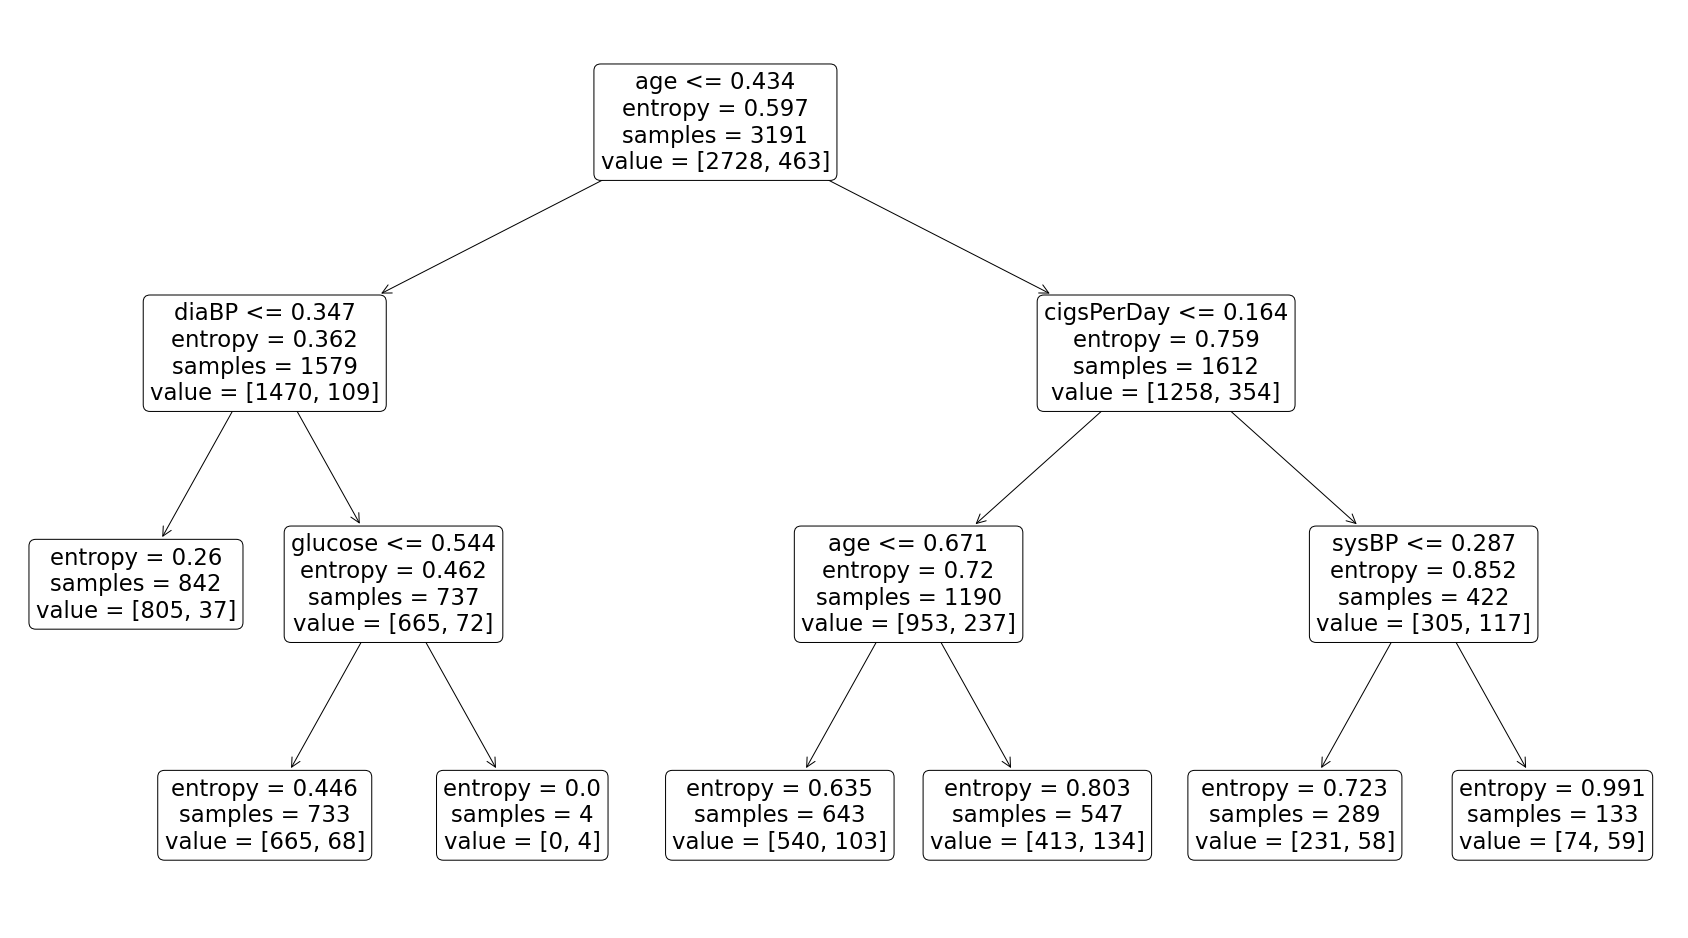

In [71]:
tree.plot_tree(dt_model,feature_names=X_train_norm.columns,rounded=True)
plt.show()

In [72]:
train_pred_des_grid=dt_model.predict(X_train_norm)

In [73]:
result = classification_report(y_train, train_pred_des_grid)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2728
           1       1.00      0.01      0.02       463

    accuracy                           0.86      3191
   macro avg       0.93      0.50      0.47      3191
weighted avg       0.88      0.86      0.79      3191



In [74]:
test_pred_des_grid=dt_model.predict(X_test_norm)
# performance measures obtained by classification_report()
result = classification_report(y_test, test_pred_des_grid)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       666
           1       0.00      0.00      0.00       132

    accuracy                           0.83       798
   macro avg       0.42      0.50      0.45       798
weighted avg       0.70      0.83      0.76       798



In [80]:
from sklearn.svm import SVC
# Create an SVM classifier
svm_clf = SVC()

# Train the model on the training data
svm_clf.fit(X_train_norm, y_train)

SVC()

In [76]:
y_pred = svm_clf.predict(X_test_norm)

In [77]:

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       666
           1       0.00      0.00      0.00       132

    accuracy                           0.83       798
   macro avg       0.42      0.50      0.45       798
weighted avg       0.70      0.83      0.76       798



In [82]:
kernels=['rbf','linear','poly','sigmoid']
mean_acc3 = list()
for k in kernels:
    clf = SVC(kernel=k).fit(X_train_norm, y_train)
    y_predict_svm=clf.predict(X_test_norm)
    mean_acc3.append(pd.Series(accuracy_score(y_test, y_predict_svm), name=k))
mean_acc3 = pd.concat(mean_acc3, axis=1)
mean_acc3

,rbf,linear,poly,sigmoid
0,0.830827,0.834586,0.83208,0.715539


#Since the mean accuracy score is highest when kernel is chosen as linear, so we fix the kernel as linear

In [84]:
#Grid Search
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_gridsvm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
gridsvm = GridSearchCV(svm_clf, param_gridsvm, refit = True, verbose = 3)
  
# fitting the model for grid search
gridsvm.fit(X_train_norm, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.854 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.856 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.856 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.854 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.854 total time=   0.2s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.854 total time=   0.2s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.856 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.856 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.854 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.854 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.854 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.856 total time= 3.7min
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.856 total time= 3.8min
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.854 total time= 1.5min
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.854 total time= 1.2min
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.854 total time= 1.2min
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.856 total time= 1.4min
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.856 total time= 1.5min
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.854 total time= 1.3min
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.854 total time= 1.3min
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.854 total time= 1.2min
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.856 total time= 1.4min
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.856 total time= 1.4min
[CV 4/5] END .C=1000, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [85]:
# print best parameter after tuning
print(gridsvm.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(gridsvm.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


In [86]:
y_pred_svm = gridsvm.predict(X_test_norm)
fit_accuracy = gridsvm.score(X_train_norm, y_train)
test_accuracy = gridsvm.score(X_test_norm, y_test)
    
print(f"Train accuracy: {fit_accuracy:0.2%}")
print(f"Test accuracy: {test_accuracy:0.2%}")

Train accuracy: 85.49%
Test accuracy: 83.46%


In [87]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       666
           1       0.00      0.00      0.00       132

    accuracy                           0.83       798
   macro avg       0.42      0.50      0.45       798
weighted avg       0.70      0.83      0.76       798



#hyperparameter tuning 
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100],  # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Type of kernel
}


grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)  # cv is the number of folds


grid_search.fit(X_train_norm, y_train)
